In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=10000)

In [3]:
len(X_train)

8982

In [4]:
len(X_test)

2246

In [5]:
#X_train[0]

In [6]:
type(y_test)

numpy.ndarray

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
deocded_newswire = ''.join([reverse_word_index.get(i-3,'?') for i in X_train[0]])

In [8]:
deocded_newswire[101]

'e'

In [9]:
#vectorize data

In [10]:
import numpy as np

In [11]:
def vectorize_data(seq,dimensions=10000):
    result = np.zeros((len(seq),dimensions))
    for i,label in enumerate(seq):
        result[i,label]=1
    return result

In [12]:
X_train = vectorize_data(X_train)
X_test = vectorize_data(X_test)

In [13]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
from keras import layers
from keras import models

In [15]:
model = models.Sequential()
model.add(layers.Dense(64,input_shape=(10000,),activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

W0815 23:17:45.351295 16212 deprecation_wrapper.py:119] From C:\Users\hriti\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 23:17:49.955255 16212 deprecation_wrapper.py:119] From C:\Users\hriti\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 23:17:51.018219 16212 deprecation_wrapper.py:119] From C:\Users\hriti\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [16]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

W0815 23:17:52.009971 16212 deprecation_wrapper.py:119] From C:\Users\hriti\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0815 23:17:52.152032 16212 deprecation_wrapper.py:119] From C:\Users\hriti\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:
x_val = X_train[:1000]
X_tt = X_train[1000:]

In [18]:
y_val = y_train[:1000]
y_tt = y_train[1000:]

In [19]:
history = model.fit(X_tt,y_tt,validation_data=(x_val,y_val),batch_size=512,epochs=20)

W0815 23:17:55.749004 16212 deprecation.py:323] From C:\Users\hriti\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0815 23:17:55.944284 16212 deprecation_wrapper.py:119] From C:\Users\hriti\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 13s 2ms/step - loss: 3.4260 - acc: 0.3183 - val_loss: 3.0428 - val_acc: 0.3750
Epoch 2/20
7982/7982 [==============================] - 1s 169us/step - loss: 2.7154 - acc: 0.4778 - val_loss: 2.4821 - val_acc: 0.5610
Epoch 3/20
7982/7982 [==============================] - 1s 168us/step - loss: 2.1790 - acc: 0.6105 - val_loss: 2.0758 - val_acc: 0.6070
Epoch 4/20
7982/7982 [==============================] - 1s 164us/step - loss: 1.8031 - acc: 0.6368 - val_loss: 1.8163 - val_acc: 0.6130
Epoch 5/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.5466 - acc: 0.6551 - val_loss: 1.6513 - val_acc: 0.6300
Epoch 6/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.3802 - acc: 0.6769 - val_loss: 1.5374 - val_acc: 0.6380
Epoch 7/20
7982/7982 [==============================] - 1s 162us/step - loss: 1.2624 - acc: 0.6961 - val_loss: 1.4823 - val_acc: 0.6480
E

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
hist_dict = history.history

In [22]:
hist_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [23]:
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

In [24]:
epochs=range(1,21)

Text(0, 0.5, 'Loss')

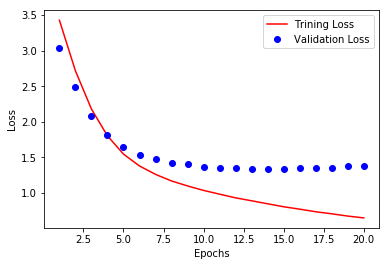

In [25]:
plt.plot(epochs,loss,'r',label='Trining Loss')
plt.plot(epochs,val_loss,'bo',label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

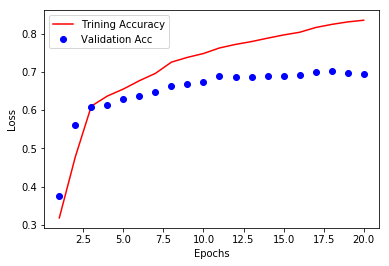

In [26]:
plt.plot(epochs,acc,'r',label='Trining Accuracy')
plt.plot(epochs,val_acc,'bo',label='Validation Acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [27]:
acc

[0.3183412682633745,
 0.47782510601168915,
 0.6104986224070553,
 0.636807817813598,
 0.6550989720314196,
 0.6768980213676411,
 0.6960661478939884,
 0.7253821088060405,
 0.737910298902688,
 0.747932848372396,
 0.7624655464513354,
 0.7717364057954527,
 0.7791280383395838,
 0.7880230514335919,
 0.7964169382600969,
 0.8034327245690536,
 0.815835630526312,
 0.823978952120731,
 0.8304936116693373,
 0.8348784759599623]

In [28]:
#model getting overfitted after 9 epochs

In [29]:
model = models.Sequential()
model.add(layers.Dense(64,input_shape=(10000,),activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_tt,y_tt,validation_data=(x_val,y_val),batch_size=512,epochs=9)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 204us/step - loss: 2.5358 - acc: 0.5228 - val_loss: 1.6798 - val_acc: 0.6530
Epoch 2/9
7982/7982 [==============================] - 1s 149us/step - loss: 1.3748 - acc: 0.7119 - val_loss: 1.2803 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 151us/step - loss: 1.0190 - acc: 0.7784 - val_loss: 1.1345 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.8031 - acc: 0.8239 - val_loss: 1.0552 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 171us/step - loss: 0.6433 - acc: 0.8613 - val_loss: 0.9774 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 184us/step - loss: 0.5147 - acc: 0.8914 - val_loss: 0.9104 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 180us/step - loss: 0.4144 - acc: 0.9144 - val_loss: 0.8941 - val_acc: 0.8220
Epoch 8

In [30]:
pred = model.evaluate(X_test,y_test)

2246/2246 [==============================] - 1s 324us/step


In [41]:
pred

[1.022498287904082, 0.7756010686194165]

In [42]:
y_test.shape

(2246, 46)

In [ ]:
#77.56